## Apple Health Processor

-----

## Dependencies and Libraries

In [1]:
from datetime import date, datetime, timedelta as td
import pytz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

------

## Functions for Processing Dates and Timezones

In [8]:
# functions to convert UTC to Shanghai time zone and extract date/time elements
convert_tz = lambda x: x.to_pydatetime().replace(tzinfo=pytz.utc).astimezone(pytz.timezone('America/Los_Angeles'))
get_year = lambda x: convert_tz(x).year
get_month = lambda x: '{}-{:02}'.format(convert_tz(x).year, convert_tz(x).month) #inefficient
get_date = lambda x: '{}-{:02}-{:02}'.format(convert_tz(x).year, convert_tz(x).month, convert_tz(x).day) #inefficient
get_day = lambda x: convert_tz(x).day
get_hour = lambda x: convert_tz(x).hour
get_day_of_week = lambda x: convert_tz(x).weekday()

---

## Steps

In [4]:
steps = pd.read_csv("apple_health_export/StepCount.csv")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
steps.tail()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
270085,Nazih’s Apple Watch,5.3,"<<HKDevice: 0x2839f35c0>, name:Apple Watch, ma...",StepCount,count,2019-09-03 18:29:11 +0300,2019-09-03 18:14:17 +0300,2019-09-03 18:14:27 +0300,23
270086,Nazih’s Apple Watch,5.3,"<<HKDevice: 0x2839f3660>, name:Apple Watch, ma...",StepCount,count,2019-09-03 18:29:11 +0300,2019-09-03 18:23:22 +0300,2019-09-03 18:23:24 +0300,12
270087,Nazih’s Apple Watch,5.3,"<<HKDevice: 0x2839f3700>, name:Apple Watch, ma...",StepCount,count,2019-09-03 18:29:11 +0300,2019-09-03 18:26:36 +0300,2019-09-03 18:26:39 +0300,8
270088,Nazih’s Apple Watch,5.3,"<<HKDevice: 0x2839f37a0>, name:Apple Watch, ma...",StepCount,count,2019-09-03 18:49:41 +0300,2019-09-03 18:45:17 +0300,2019-09-03 18:45:22 +0300,13
270089,Nazih’s Apple Watch,5.3,"<<HKDevice: 0x2839f3840>, name:Apple Watch, ma...",StepCount,count,2019-09-03 18:49:41 +0300,2019-09-03 18:46:16 +0300,2019-09-03 18:46:44 +0300,27


In [9]:
# parse out date and time elements as Shanghai time
steps['startDate'] = pd.to_datetime(steps['startDate'])
steps['year'] = steps['startDate'].map(get_year)
steps['month'] = steps['startDate'].map(get_month)
steps['date'] = steps['startDate'].map(get_date)
steps['day'] = steps['startDate'].map(get_day)
steps['hour'] = steps['startDate'].map(get_hour)
steps['dow'] = steps['startDate'].map(get_day_of_week)

In [10]:
steps.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value,year,month,date,day,hour,dow
0,Nazih’s Apple Watch,5,"<<HKDevice: 0x283adc1e0>, name:Apple Watch, ma...",StepCount,count,2018-11-18 08:34:40 +0300,2018-11-18 08:22:31+03:00,2018-11-18 08:23:28 +0300,105,2018,2018-11,2018-11-18,18,0,6
1,Nazih’s Apple Watch,5,"<<HKDevice: 0x283adc280>, name:Apple Watch, ma...",StepCount,count,2018-11-18 08:34:40 +0300,2018-11-18 08:23:40+03:00,2018-11-18 08:24:41 +0300,98,2018,2018-11,2018-11-18,18,0,6
2,Nazih’s Apple Watch,5,"<<HKDevice: 0x283adc320>, name:Apple Watch, ma...",StepCount,count,2018-11-18 08:34:40 +0300,2018-11-18 08:24:41+03:00,2018-11-18 08:25:42 +0300,114,2018,2018-11,2018-11-18,18,0,6
3,Nazih’s Apple Watch,5,"<<HKDevice: 0x283adc3c0>, name:Apple Watch, ma...",StepCount,count,2018-11-18 08:34:40 +0300,2018-11-18 08:25:42+03:00,2018-11-18 08:26:44 +0300,125,2018,2018-11,2018-11-18,18,0,6
4,Nazih’s Apple Watch,5,"<<HKDevice: 0x283adc460>, name:Apple Watch, ma...",StepCount,count,2018-11-18 08:34:40 +0300,2018-11-18 08:26:44+03:00,2018-11-18 08:27:43 +0300,119,2018,2018-11,2018-11-18,18,0,6


In [11]:
steps.columns

Index(['sourceName', 'sourceVersion', 'device', 'type', 'unit', 'creationDate',
       'startDate', 'endDate', 'value', 'year', 'month', 'date', 'day', 'hour',
       'dow'],
      dtype='object')

In [12]:
steps_by_date = steps.groupby(['date'])['value'].sum().reset_index(name='Steps')

In [13]:
steps_by_date.tail()

,date,Steps
1620,2019-08-30,17214
1621,2019-08-31,13864
1622,2019-09-01,15247
1623,2019-09-02,8240
1624,2019-09-03,10560


In [10]:
# steps_by_date.tail(10)
steps_by_date.to_csv("data/steps_per_day.csv", index=False)

-----

### Use Only Watch Steps, Remove Phone Steps

In [14]:
steps_device_by_year = steps.groupby(['year', 'sourceName'])['value'].sum().reset_index(name='Steps')

In [15]:
steps_device_by_year

,year,sourceName,Steps
0,2015,Nazih's iPhone 7,3561830
1,2016,Nazih's iPhone 7,3000522
2,2017,Nazih's iPhone 7,3583724
3,2017,Nazih’s Apple Watch,660617
4,2018,Nazih's iPhone 7,2394055
5,2018,Nazih’s Apple Watch,3680260
6,2018,Nazih’s iPhone,2218918
7,2019,Nazih’s Apple Watch,1763809
8,2019,Nazih’s iPhone,1473867


In [16]:
steps.sourceName.unique()

array(['Nazih’s Apple\xa0Watch', 'Nazih’s iPhone', "Nazih's iPhone 7"],
      dtype=object)

In [17]:
# drop phone steps
steps_watch = steps[steps.sourceName == 'Nazih’s Apple\xa0Watch']
# steps.head()

## Rolling Average

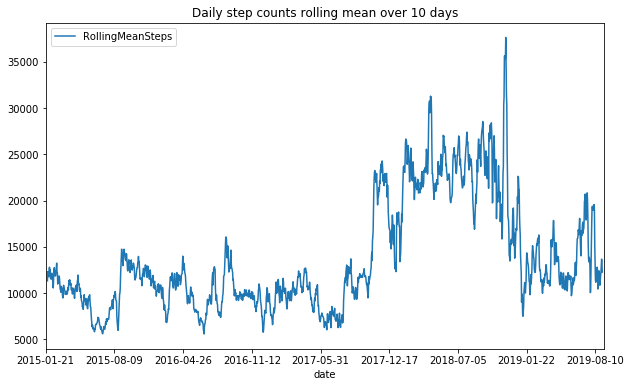

In [18]:
steps_by_date['RollingMeanSteps'] = steps_by_date.Steps.rolling(window=10, center=True).mean()
steps_by_date.plot(x='date', y='RollingMeanSteps', title= 'Daily step counts rolling mean over 10 days', figsize=[10, 6])

## Steps by Day of Week

In [19]:
steps_by_date['date'] = pd.to_datetime(steps_by_date['date'])
steps_by_date['dow'] = steps_by_date['date'].dt.weekday

Text(0.5, 0, 'Day of Week')

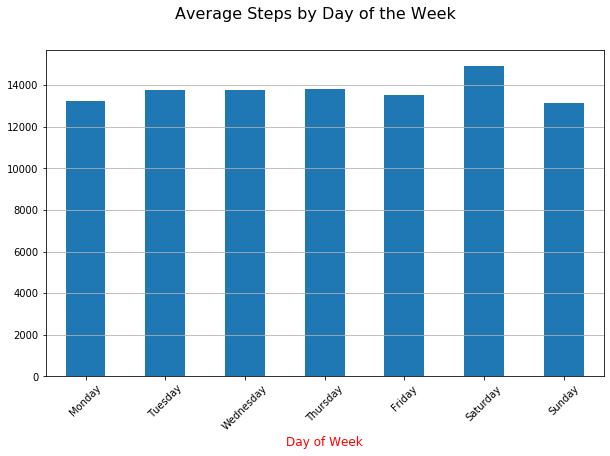

In [20]:
data = steps_by_date.groupby(['dow'])['Steps'].mean()

fig, ax = plt.subplots(figsize=[10, 6])
ax = data.plot(kind='bar', x='day_of_week')

n_groups = len(data)
index = np.arange(n_groups)
opacity = 0.75

#fig, ax = plt.subplots(figsize=[10, 6])
ax.yaxis.grid(True)

plt.suptitle('Average Steps by Day of the Week', fontsize=16)
dow_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(index, dow_labels, rotation=45)
plt.xlabel('Day of Week', fontsize=12, color='red')

------

## Monthly Steps

In [21]:
total_steps_by_month = steps.groupby(['month'])['value'].sum().reset_index(name='Steps')

In [22]:
total_steps_by_month

,month,Steps
0,2015-01,124111
1,2015-02,336801
2,2015-03,322253
3,2015-04,315929
4,2015-05,283191
5,2015-06,200906
6,2015-07,217636
7,2015-08,290113
8,2015-09,400849
9,2015-10,384398


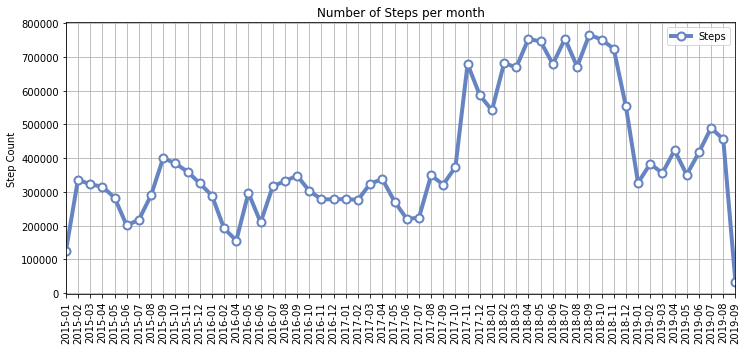

In [23]:
# a bit of a hackish solution, could use improvement
dataset = total_steps_by_month
chart_title = 'Number of Steps per month'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
ax.set_xticks(index)
ax.set_ylabel('Step Count')
# ax.set_xlabel('')
plt.xticks(index, dataset.month, rotation=90)
ax.set_title(chart_title)

plt.show()

----

## Steps Per Year

In [21]:
total_steps_by_years = steps.groupby(['year'])['value'].sum().reset_index(name='Steps')

In [22]:
total_steps_by_years

,year,Steps
0,2017,3212141
1,2018,3849766
2,2019,1748191


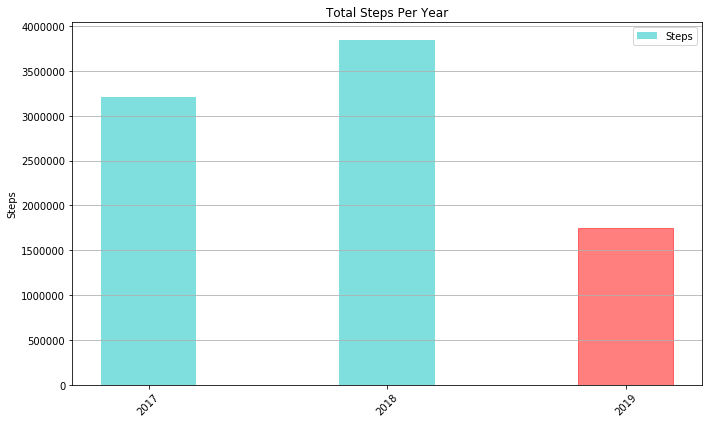

In [23]:
dataset = total_steps_by_years

n_groups = len(dataset)
opacity = 0.5
fig, ax = plt.subplots(figsize=[10, 6])
ax.yaxis.grid(True)
index = np.arange(n_groups)
bar_width = 0.4

data = plt.bar(index, dataset.Steps, bar_width,
                 alpha=opacity,
                 color='c',
                 label='Steps')

data[-1].set_color('r')

plt.ylabel('Steps')
plt.title('Total Steps Per Year')
plt.xticks(index, dataset.year, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

-----

## Steps by Hour of Day

In [24]:
hour_steps = steps.groupby(['hour'])['value'].sum().reset_index(name='Steps')

In [25]:
# hour_steps

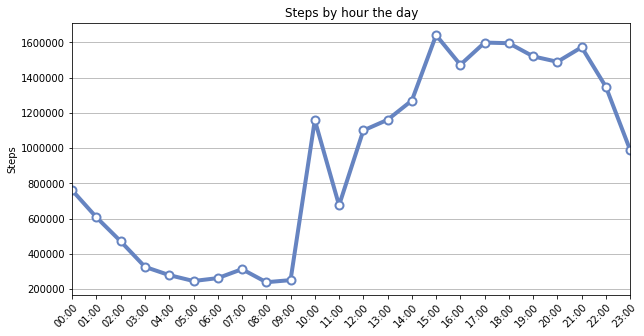

In [26]:
ax = hour_steps.Steps.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

xlabels = hour_steps.index.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

# ax.set_xlim((hour_steps.index[0], hour_steps.index[-1]))

ax.yaxis.grid(True)
# ax.set_ylim((0, 1300))
ax.set_ylabel('Steps')
ax.set_xlabel('')
ax.set_title('Steps by hour the day')

plt.show()

-----

# Resting Heart Rate

In [27]:
restingHR = pd.read_csv("apple_health_export/RestingHeartRate.csv")

In [29]:
restingHR.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
0,Nazih’s Apple Watch,5.0,NaN,RestingHeartRate,count/min,2018-11-18 16:45:01 +0300,2018-11-17 18:02:50 +0300,2018-11-18 16:40:53 +0300,41
1,Nazih’s Apple Watch,5.0,NaN,RestingHeartRate,count/min,2018-11-19 15:59:36 +0300,2018-11-18 18:03:46 +0300,2018-11-19 15:56:08 +0300,43
2,Nazih’s Apple Watch,5.0,NaN,RestingHeartRate,count/min,2018-11-20 14:12:26 +0300,2018-11-20 02:10:32 +0300,2018-11-20 14:04:44 +0300,42
3,Nazih’s Apple Watch,5.0,NaN,RestingHeartRate,count/min,2018-11-22 22:30:31 +0300,2018-11-21 18:00:48 +0300,2018-11-22 13:40:08 +0300,37
4,Nazih’s Apple Watch,5.0,NaN,RestingHeartRate,count/min,2018-11-23 00:34:16 +0300,2018-11-21 02:08:09 +0300,2018-11-21 17:55:15 +0300,44


In [30]:
# parse out date and time elements as Shanghai time
restingHR['startDate'] = pd.to_datetime(restingHR['startDate'])
restingHR['year'] = restingHR['startDate'].map(get_year)
restingHR['month'] = restingHR['startDate'].map(get_month)
restingHR['date'] = restingHR['startDate'].map(get_date)
restingHR['day'] = restingHR['startDate'].map(get_day)
restingHR['hour'] = restingHR['startDate'].map(get_hour)
restingHR['dow'] = restingHR['startDate'].map(get_day_of_week)

In [31]:
restingHR.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value,year,month,date,day,hour,dow
0,Nazih’s Apple Watch,5.0,NaN,RestingHeartRate,count/min,2018-11-18 16:45:01 +0300,2018-11-17 18:02:50+03:00,2018-11-18 16:40:53 +0300,41,2018,2018-11,2018-11-17,17,10,5
1,Nazih’s Apple Watch,5.0,NaN,RestingHeartRate,count/min,2018-11-19 15:59:36 +0300,2018-11-18 18:03:46+03:00,2018-11-19 15:56:08 +0300,43,2018,2018-11,2018-11-18,18,10,6
2,Nazih’s Apple Watch,5.0,NaN,RestingHeartRate,count/min,2018-11-20 14:12:26 +0300,2018-11-20 02:10:32+03:00,2018-11-20 14:04:44 +0300,42,2018,2018-11,2018-11-19,19,18,0
3,Nazih’s Apple Watch,5.0,NaN,RestingHeartRate,count/min,2018-11-22 22:30:31 +0300,2018-11-21 18:00:48+03:00,2018-11-22 13:40:08 +0300,37,2018,2018-11,2018-11-21,21,10,2
4,Nazih’s Apple Watch,5.0,NaN,RestingHeartRate,count/min,2018-11-23 00:34:16 +0300,2018-11-21 02:08:09+03:00,2018-11-21 17:55:15 +0300,44,2018,2018-11,2018-11-20,20,18,1


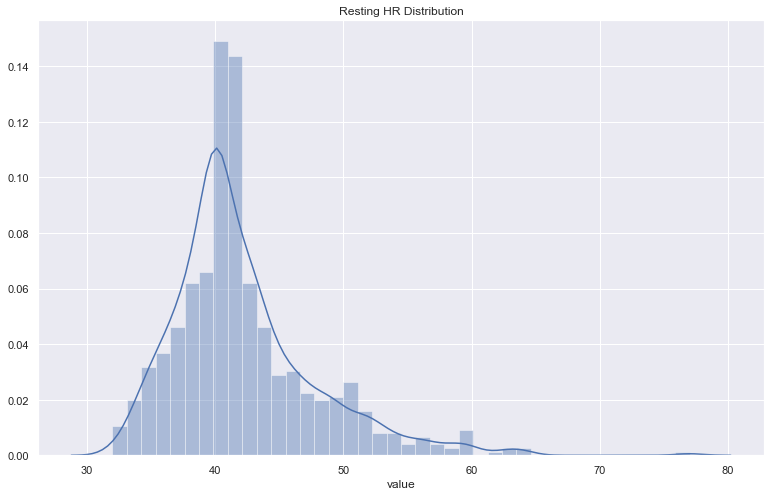

In [55]:
plt.figure(figsize = (13,8))
plt.title('Resting HR Distribution')
sns.distplot(restingHR.value, kde = True)

## Hourly HR 

In [34]:
hour_restHR = restingHR.groupby(['hour'])['value'].mean().reset_index(name='RestHR')

In [35]:
hour_restHR.head()

,hour,RestHR
0,0,44.571429
1,1,41.188679
2,2,42.666667
3,3,40.299611
4,4,38.000000


In [36]:
import seaborn as sns

Text(0.5, 1.0, 'Mean Resting Heart Rate by Hour')

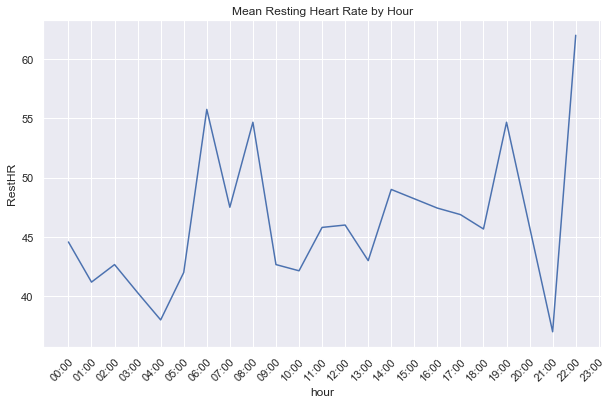

In [67]:
import seaborn as sns
sns.set()
plt.figure(figsize = (10,6))
ax = sns.lineplot(x = 'hour', y = 'RestHR', data = hour_restHR, markers=True, dashes=False)
xlabels = hour_steps.index.map(lambda x: '{:02}:00'.format(x))
xtic = ax.set_xticks(range(len(xlabels)))
xtic = ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

plt.title('Mean Resting Heart Rate by Hour')


In [68]:
restingHR.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value,year,month,date,day,hour,dow
0,Nazih’s Apple Watch,5.0,NaN,RestingHeartRate,count/min,2018-11-18 16:45:01 +0300,2018-11-17 18:02:50+03:00,2018-11-18 16:40:53 +0300,41,2018,2018-11,2018-11-17,17,10,5
1,Nazih’s Apple Watch,5.0,NaN,RestingHeartRate,count/min,2018-11-19 15:59:36 +0300,2018-11-18 18:03:46+03:00,2018-11-19 15:56:08 +0300,43,2018,2018-11,2018-11-18,18,10,6
2,Nazih’s Apple Watch,5.0,NaN,RestingHeartRate,count/min,2018-11-20 14:12:26 +0300,2018-11-20 02:10:32+03:00,2018-11-20 14:04:44 +0300,42,2018,2018-11,2018-11-19,19,18,0
3,Nazih’s Apple Watch,5.0,NaN,RestingHeartRate,count/min,2018-11-22 22:30:31 +0300,2018-11-21 18:00:48+03:00,2018-11-22 13:40:08 +0300,37,2018,2018-11,2018-11-21,21,10,2
4,Nazih’s Apple Watch,5.0,NaN,RestingHeartRate,count/min,2018-11-23 00:34:16 +0300,2018-11-21 02:08:09+03:00,2018-11-21 17:55:15 +0300,44,2018,2018-11,2018-11-20,20,18,1


In [69]:
dow_restHR = restingHR.groupby(['dow'])['value'].mean().reset_index(name='RestHR')

In [88]:
dow_restHR.dow.nunique()

7

Text(0.5, 1.0, 'Mean Resting Heart Rate by Hour')

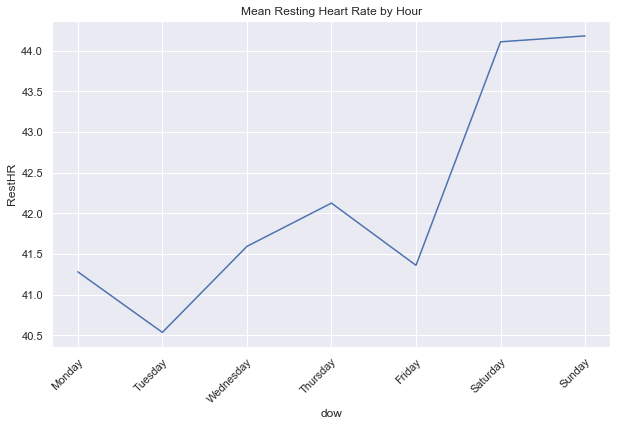

In [91]:
plt.figure(figsize = (10,6))
ax = sns.lineplot(x = 'dow', y = 'RestHR', data = dow_restHR, markers=True, dashes=False)
xlabels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
xtic = ax.set_xticks(range(dow_restHR.dow.nunique()))
xtic = ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

plt.title('Mean Resting Heart Rate by Hour')


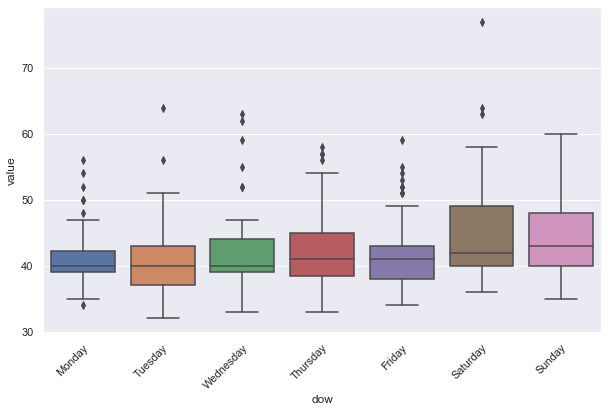

In [95]:
plt.figure(figsize = (10,6))

ax = sns.boxplot(x = 'dow', y = 'value', data = restingHR)
xlabels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
xtic = ax.set_xticks(range(dow_restHR.dow.nunique()))
xtic = ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')


# Heart Rate (overall)

In [96]:
HR = pd.read_csv("apple_health_export/HeartRate.csv")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [98]:
HR.tail()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
470298,Nazih’s Apple Watch,5.3,"<<HKDevice: 0x28392f840>, name:Apple Watch, ma...",HeartRate,count/min,2019-09-03 18:34:42 +0300,2019-09-03 18:30:12 +0300,2019-09-03 18:30:12 +0300,48.0
470299,Nazih’s Apple Watch,5.3,"<<HKDevice: 0x28393c6e0>, name:Apple Watch, ma...",HeartRate,count/min,2019-09-03 18:40:29 +0300,2019-09-03 18:35:19 +0300,2019-09-03 18:35:19 +0300,47.0
470300,Nazih’s Apple Watch,5.3,"<<HKDevice: 0x28396adf0>, name:Apple Watch, ma...",HeartRate,count/min,2019-09-03 18:45:00 +0300,2019-09-03 18:39:31 +0300,2019-09-03 18:39:31 +0300,48.0
470301,Nazih’s Apple Watch,5.3,"<<HKDevice: 0x28396b750>, name:Apple Watch, ma...",HeartRate,count/min,2019-09-03 18:51:35 +0300,2019-09-03 18:48:37 +0300,2019-09-03 18:48:37 +0300,45.0
470302,Nazih’s Apple Watch,5.3,"<<HKDevice: 0x28396b7f0>, name:Apple Watch, ma...",HeartRate,count/min,2019-09-03 18:54:57 +0300,2019-09-03 18:54:04 +0300,2019-09-03 18:54:04 +0300,44.0


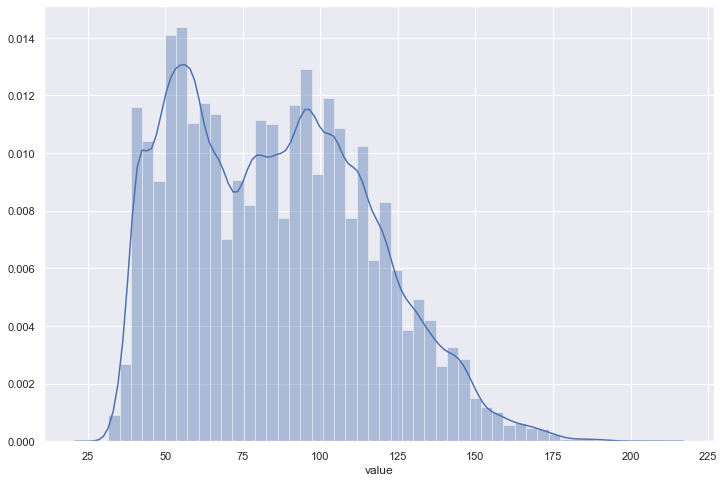

In [101]:
plt.figure(figsize = (12,8))
sns.distplot(HR.value, kde= True)

In [102]:
# parse out date and time elements as Shanghai time
HR['startDate'] = pd.to_datetime(HR['startDate'])
HR['year'] = HR['startDate'].map(get_year)
HR['month'] = HR['startDate'].map(get_month)
HR['date'] = HR['startDate'].map(get_date)
HR['day'] = HR['startDate'].map(get_day)
HR['hour'] = HR['startDate'].map(get_hour)
HR['dow'] = HR['startDate'].map(get_day_of_week)

In [104]:
HR.tail()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value,year,month,date,day,hour,dow
470298,Nazih’s Apple Watch,5.3,"<<HKDevice: 0x28392f840>, name:Apple Watch, ma...",HeartRate,count/min,2019-09-03 18:34:42 +0300,2019-09-03 18:30:12+03:00,2019-09-03 18:30:12 +0300,48.0,2019,2019-09,2019-09-03,3,11,1
470299,Nazih’s Apple Watch,5.3,"<<HKDevice: 0x28393c6e0>, name:Apple Watch, ma...",HeartRate,count/min,2019-09-03 18:40:29 +0300,2019-09-03 18:35:19+03:00,2019-09-03 18:35:19 +0300,47.0,2019,2019-09,2019-09-03,3,11,1
470300,Nazih’s Apple Watch,5.3,"<<HKDevice: 0x28396adf0>, name:Apple Watch, ma...",HeartRate,count/min,2019-09-03 18:45:00 +0300,2019-09-03 18:39:31+03:00,2019-09-03 18:39:31 +0300,48.0,2019,2019-09,2019-09-03,3,11,1
470301,Nazih’s Apple Watch,5.3,"<<HKDevice: 0x28396b750>, name:Apple Watch, ma...",HeartRate,count/min,2019-09-03 18:51:35 +0300,2019-09-03 18:48:37+03:00,2019-09-03 18:48:37 +0300,45.0,2019,2019-09,2019-09-03,3,11,1
470302,Nazih’s Apple Watch,5.3,"<<HKDevice: 0x28396b7f0>, name:Apple Watch, ma...",HeartRate,count/min,2019-09-03 18:54:57 +0300,2019-09-03 18:54:04+03:00,2019-09-03 18:54:04 +0300,44.0,2019,2019-09,2019-09-03,3,11,1


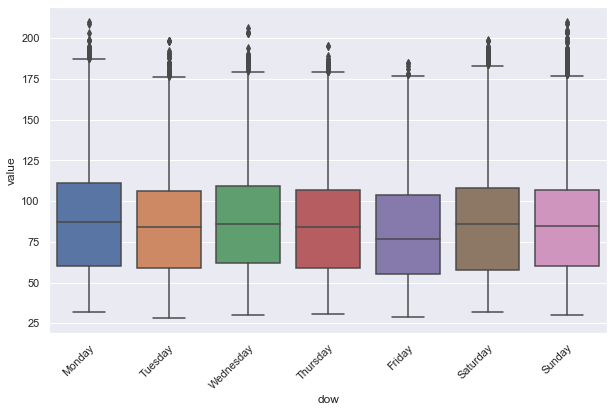

In [103]:
plt.figure(figsize = (10,6))

ax = sns.boxplot(x = 'dow', y = 'value', data = HR)
xlabels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
xtic = ax.set_xticks(range(dow_restHR.dow.nunique()))
xtic = ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')


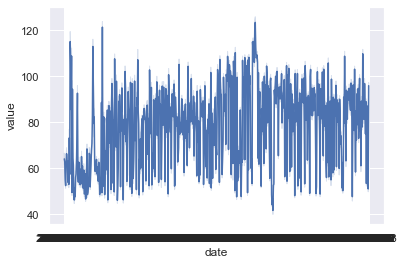

In [105]:
sns.lineplot(x = 'date', y = 'value', data = HR)

In [108]:
avgHR_hour = HR.groupby(['hour'])['value'].mean().reset_index(name = 'AvgHR')

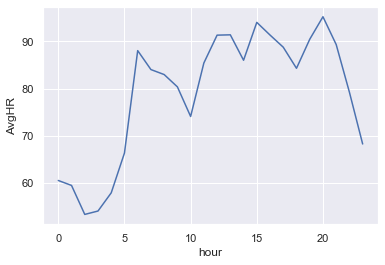

In [109]:
sns.lineplot(x = 'hour', y = 'AvgHR', data = avgHR_hour)

# Active Energy Burned

In [110]:
Act_energy = pd.read_csv('apple_health_export/ActiveEnergyBurned.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [111]:
Act_energy.tail()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
1305737,Nazih’s Apple Watch,5.3,"<<HKDevice: 0x2839f8a50>, name:Apple Watch, ma...",ActiveEnergyBurned,kcal,2019-09-03 18:48:42 +0300,2019-09-03 18:45:22 +0300,2019-09-03 18:46:24 +0300,0.428
1305738,Nazih’s Apple Watch,5.3,"<<HKDevice: 0x2839f8af0>, name:Apple Watch, ma...",ActiveEnergyBurned,kcal,2019-09-03 18:48:42 +0300,2019-09-03 18:46:24 +0300,2019-09-03 18:47:05 +0300,0.542
1305739,Nazih’s Apple Watch,5.3,"<<HKDevice: 0x2839f8b90>, name:Apple Watch, ma...",ActiveEnergyBurned,kcal,2019-09-03 18:51:35 +0300,2019-09-03 18:50:19 +0300,2019-09-03 18:50:29 +0300,0.082
1305740,Nazih’s Apple Watch,5.3,"<<HKDevice: 0x2839f8c30>, name:Apple Watch, ma...",ActiveEnergyBurned,kcal,2019-09-03 18:54:57 +0300,2019-09-03 18:52:12 +0300,2019-09-03 18:52:53 +0300,0.165
1305741,Nazih’s Apple Watch,5.3,"<<HKDevice: 0x2839f8cd0>, name:Apple Watch, ma...",ActiveEnergyBurned,kcal,2019-09-03 18:58:20 +0300,2019-09-03 18:55:47 +0300,2019-09-03 18:55:57 +0300,0.027


In [112]:
# parse out date and time elements as Shanghai time
Act_energy['startDate'] = pd.to_datetime(Act_energy['startDate'])
Act_energy['year'] = Act_energy['startDate'].map(get_year)
Act_energy['month'] = Act_energy['startDate'].map(get_month)
Act_energy['date'] = Act_energy['startDate'].map(get_date)
Act_energy['day'] = Act_energy['startDate'].map(get_day)
Act_energy['hour'] = Act_energy['startDate'].map(get_hour)
Act_energy['dow'] = Act_energy['startDate'].map(get_day_of_week)

In [128]:
daily_act_cals = Act_energy.groupby(['dow','date'])['value'].sum().reset_index(name = 'Daily_Act_Cals')

Text(0.5, 1.0, 'Sum Active Cals by DOW')

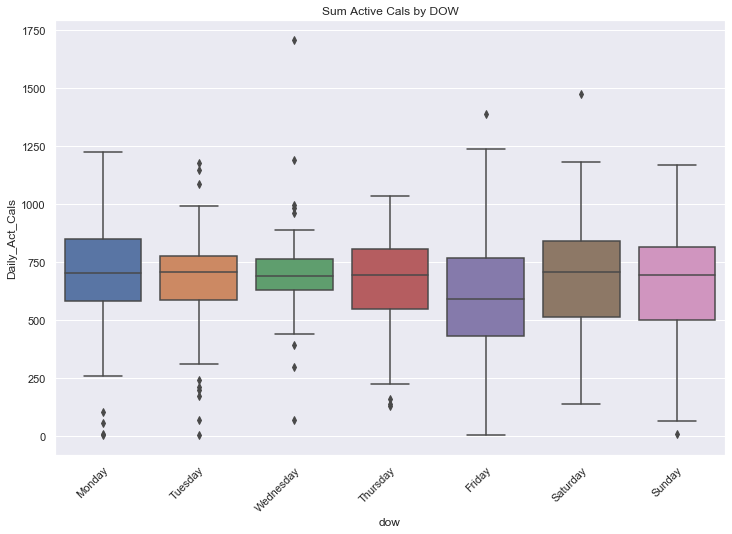

In [129]:
plt.figure(figsize = (12,8))
ax = sns.boxplot(x = 'dow', y = 'Daily_Act_Cals', data= daily_act_cals)
xlabels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
xtic = ax.set_xticks(range(dow_restHR.dow.nunique()))
xtic = ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

plt.title('Sum Active Cals by DOW')


Text(0.5, 1.0, 'Sum Active Cals by DOW')

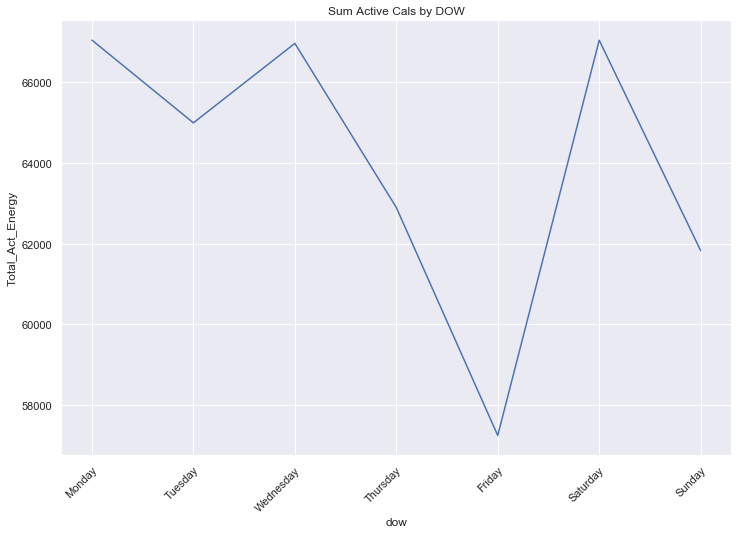

In [130]:
dow_act_cals = Act_energy.groupby(['dow'])['value'].sum().reset_index(name = 'Total_Act_Energy')

plt.figure(figsize = (12,8))
ax = sns.lineplot(x = 'dow', y = 'Total_Act_Energy', data= dow_act_cals)
xlabels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
xtic = ax.set_xticks(range(dow_restHR.dow.nunique()))
xtic = ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

plt.title('Sum Active Cals by DOW')


Text(0.5, 1.0, 'Sum Active Cals by DOW')

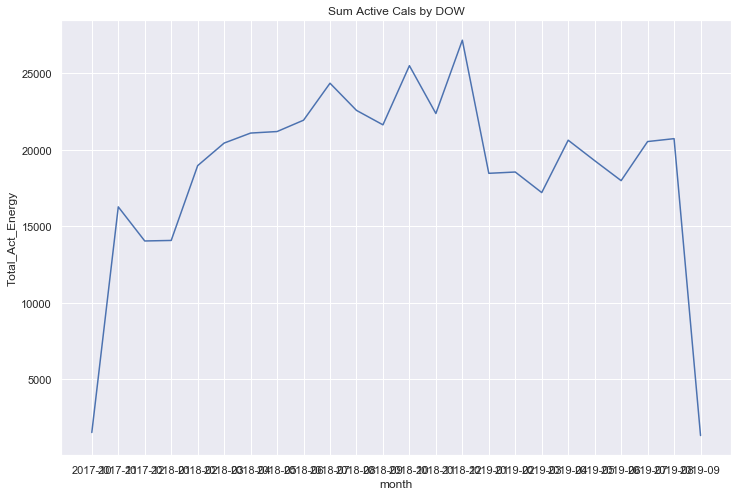

In [132]:
monthly_act_energy = Act_energy.groupby(['month'])['value'].sum().reset_index(name = 'Total_Act_Energy')

plt.figure(figsize = (12,8))
ax = sns.lineplot(x = 'month', y = 'Total_Act_Energy', data= monthly_act_energy)
#xlabels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#xtic = ax.set_xticks(range(dow_restHR.dow.nunique()))
#xtic = ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

plt.title('Sum Active Cals by DOW')


In [137]:
Act_energy.groupby(['date'])['value'].sum().mean()

666.7049032738095

In [138]:
A = [1, 3, 5, 2, 4, 6, 7]

In [139]:
def minimumSwaps(arr):
    count = 0
    for i in range(0,len(arr)-1):
        minIndex = i
        for j in range(i+1, len(arr)):
            if arr[j] < arr[i]:
                minIndex = j
        if minIndex != i:
            arr[i], arr[j] = arr[j], arr[i]
            count += 1
    print(int(count))

In [140]:
minimumSwaps(A)

3
